In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
from scipy import stats
sns.plt = plt
np.random.seed(1) # No estoy seguro si es necesario


In [3]:
df = pd.read_csv('tiempos.txt', sep=' ')

print(df.describe())
print(df.tail(12))


          Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
count  12.000000   12.000000       12.000000      12.000000
mean    6.500000   13.908333       13.866667      33.158333
std     3.605551    2.025949        1.789024      49.079332
min     1.000000   11.000000       11.300000      18.200000
25%     3.750000   12.150000       12.475000      18.775000
50%     6.500000   14.400000       14.100000      19.050000
75%     9.250000   15.350000       14.950000      19.250000
max    12.000000   17.000000       16.700000     189.000000
    Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
0        1        11.1            11.3           19.4
1        2        13.0            12.8           18.2
2        3        16.1            16.0           19.0
3        4        14.5            14.1           18.9
4        5        12.0            12.5           19.1
5        6        11.0            11.6           18.7
6        7        15.1            14.6          189.0
7        8        14.4      

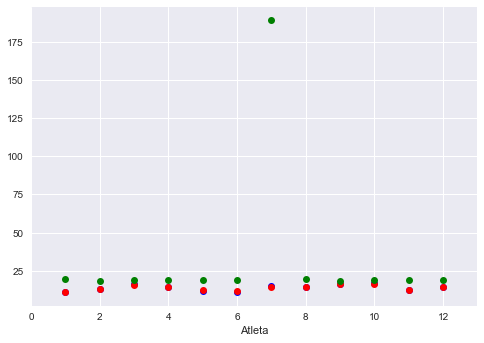

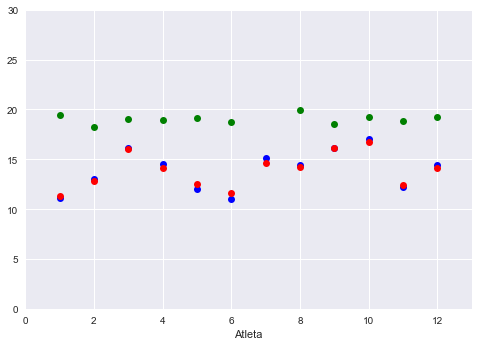

In [6]:
df = pd.read_csv('tiempos.txt', sep=' ')
sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")
sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")
sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")
plt.show()

sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")
sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")
sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")

LLUVIA_LIMIT = 30
sns.plt.ylim((0,LLUVIA_LIMIT))
sns.plt.show()


4.6
0
0.0


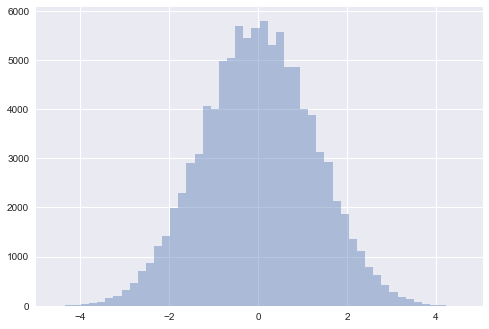

In [9]:

# Respuesta a : Los atletas son m´as lentos en d´ıas de lluvia que en d´ıas soleados.

# Vamos a ver si los atletas son mas lentos en dias de lluvia que en dias soleados.
#para eso vamos a hacer un test de permutacion

# Creo numpy array con datos soleados y datos de lluvia sin outlier en tuplas indicando su grupo
datos_sol = df.values[:,1]
datos_lluvia = np.array(filter(lambda x : x < LLUVIA_LIMIT, df.values[:,3]))

delta_0 = np.median(datos_lluvia) - np.median(datos_sol)
print(delta_0)

datos_bool =  np.concatenate([np.zeros(datos_lluvia.size, dtype=bool),np.ones(datos_sol.size, dtype=bool)])
datos_val = np.concatenate([datos_sol,datos_lluvia])

PERM_COUNT = 100000

def simulate():
    perm = np.random.permutation(datos_bool)
    ll_sum = 0
    ll_count = 0
    s_sum = 0
    s_count = 0
    for is_soleado, val in zip(perm, datos_val):
        if is_soleado:
            s_count += 1
            s_sum += val
        else:
            ll_count += 1
            ll_sum += val
    return (ll_sum/ll_count) - (s_sum/s_count)
        
deltas = np.array([simulate() for i in range(PERM_COUNT)])
reject_delta_count = len(filter(lambda x: x > delta_0, deltas))
print reject_delta_count
print float(reject_delta_count)/PERM_COUNT


sns.distplot(deltas, kde=False, rug=False)
sns.plt.show()







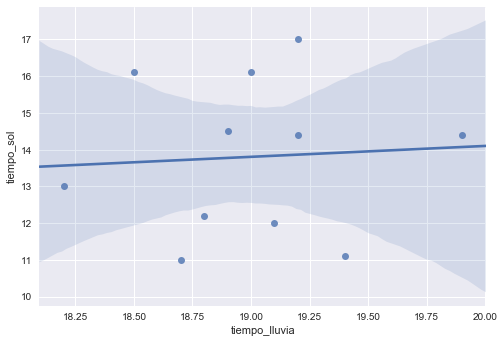

(0.15320331076002475, 0.65290737618181061)


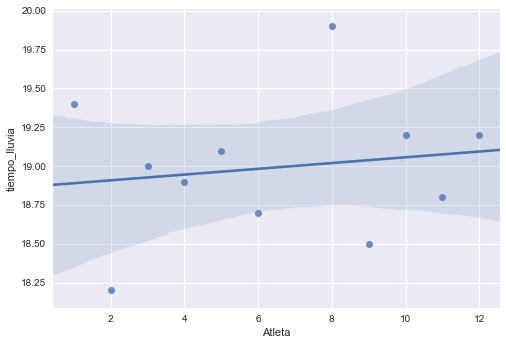

In [29]:
# Respuesta a : Si sirve de algo entrenar en lluvia

df2 = df[df['tiempo_lluvia'] < LLUVIA_LIMIT]

sns.regplot(x=df2['tiempo_lluvia'], y=df2['tiempo_sol'])
sns.plt.show()

# No hay correlacion entre la performance en lluvia y la performance en dias soleados
# Esto puede deberse a que todos tiene casi la misma performance en lluvia

In [14]:
# RTA a : El cielo nublado no influye en los tiempos de los atletas.

datos_sol = df.values[:,1]
datos_nublado = df.values[:,2]

# Si el tiempo nublado influyese entonces tendrian distinta media

# Hipotesis : No tienen la misma media
# Hipotesis nula: Tienen la misma media
# Tomamos como estadistico a 0.05

print(stats.ttest_rel(datos_sol,datos_nublado))

# Con el p-valor arrojado, no podemos rechazar la hipotesis nula.
# No tenemos suficiente informacion para saber si tienen o no la misma media.
# Si tuvieran distinta media, segun el test, el p-valor deberia dar menor a 0.05

print(stats.wilcoxon(datos_sol, datos_nublado, zero_method='wilcox', correction=False))



Ttest_relResult(statistic=0.41213824986058739, pvalue=0.68815561156045579)
WilcoxonResult(statistic=28.5, pvalue=0.68820650307382913)


In [ ]:
# Rta a: La velocidad en dias de lluvia es independiente del atleta

a = np.ones(11)
a[0] = 0.999
print(stats.pearsonr(df2['tiempo_lluvia'],df2['Atleta']))

sns.regplot(x=df2['Atleta'], y=df2['tiempo_lluvia'])
sns.plt.show()



In [ ]:
# El clima influye en la velocidad de los atletas
#Claramente si,  no sabemos como hacerlo